PETR 6397 Petroleum Data Analytics

Spring 2023 Take Home Exam 2 - 03/23/2023

150 Total Points




Instructions for academic integrity for this exam:

- No collaboration is allowed. Any collaboration noticed between students or cheating of any sort will result in a grade of ZERO on the midterm for the students involved in the act!
- You may not share, disseminate, or discuss these questions with any other student in another section of this course who has not taken the exam yet; doing so is considered academic dishonesty and will lead to nullification of exam grades.
- This assessment may not be posted online or disseminated.
- There will no tolerance towards academic dishonesty, and cheating can and will lead to automatic failure from the class as well as a report to the Academic Integrity Committee.
- You must sign the statement below on academic integrity for this exam to be graded.

 
 

My signature below constitutes my pledge that I have followed University of Houston’s policy on academic integrity as well as the specific instructions for this quiz. I affirm that this exam represents my own work, without the use of any unpermitted aids or resources. I confirm that I did NOT act in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, personating another person, and committing plagiarism. I understand that there will no tolerance towards academic dishonesty, and that cheating can and will lead to automatic failure from the class as well as a report to the Academic Integrity Committee.

 

 

Signature:

Rahul Krishna Gunneri

Edit this cell with your name and ID. <br>

__Name__:Rahul Krishna Gunneri

__ID__:2210264

# Part 1

### Problem Statement
Dataset #1 
This data is from the Council Grove gas reservoir in Southwest Kansas.  The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas.  This dataset is from nine wells (with 4149 examples), consisting of a set of seven predictor variables and a rock facies (class) for each example vector and validation (test) data (830 examples from two wells) having the same seven predictor variables in the feature vector.  Facies are based on examination of cores from nine wells taken vertically at half-foot intervals. Predictor variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge. These are essentially continuous variables sampled at a half-foot sample rate. 

The seven predictor variables are:
* Five wire line log curves include [gamma ray](http://petrowiki.org/Gamma_ray_logs) (GR), [resistivity logging](http://petrowiki.org/Resistivity_and_spontaneous_%28SP%29_logging) (ILD_log10),
[photoelectric effect](http://www.glossary.oilfield.slb.com/en/Terms/p/photoelectric_effect.aspx) (PE), [neutron-density porosity difference and average neutron-density porosity](http://petrowiki.org/Neutron_porosity_logs) (DeltaPHI and PHIND). Note, some wells do not have PE.
* Two geologic constraining variables: nonmarine-marine indicator (NM_M) and relative position (RELPOS)

The nine discrete facies (classes of rocks) are: 
1. Nonmarine sandstone
2. Nonmarine coarse siltstone 
3. Nonmarine fine siltstone 
4. Marine siltstone and shale 
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

The following table lists the facies, their abbreviated labels.

Facies |Label|
:---: | :---: |
1 |SS| 
2 |CSiS| 
3 |FSiS| 
4 |SiSh| 
5 |MS| 
6 |WS| 
7 |D| 
8 |PS| 
9 |BS|

### Question

Explore the facies_class.xlsx dataset. Develop and optimize multilabel classifiers using data in sheet 'facies_vectors' to predict facies for 'Well Nolan'. 

Use data in sheet 'facies_vector' for training and testing the classifiers. 

Deploy the classifiers on the data in sheel 'Well Nolan'

> CAUTION 1: Missing data in the sheet 'facies_vector'. Use cubic spline interpolation to fix the missing values. 

> CAUTION 2: In the sheet 'Well Nolan', certain rows in the middle and end have a Well Name 'BAD'. Dont predict for those rows. Automate the detection of rows where the Well Name is BAD and dont predict for those rows. 

Try at least two classification techniques that are suited for MultiLabel Classification.

Manually refine the most important hyperparameters of the classifiers to obtain acceptable performance. 

> Use Confusion Matrix and Classification Report for evaluating the classifiers. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site.

> Use Pandas get dummies function to convert the single column of target to a multiple columns of targets. In this way, you can perform multilabel classification instead of multiclass classification. 

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [137]:
facies_supervised=pd.read_excel("/content/drive/MyDrive/Data_sets/PETR/Exam2_facies.xlsx")
facies_unsupervised=pd.read_excel("/content/drive/MyDrive/Data_sets/PETR/Exam2_facies.xlsx",sheet_name="Well Nolan")

In [138]:
facies_supervised.head()

,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,3
1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,3
2,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,3
3,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,3
4,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,3


In [139]:
facies_supervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Well Name  1381 non-null   object 
 1   Depth      1381 non-null   float64
 2   GR         1377 non-null   float64
 3   ILD_log10  1376 non-null   float64
 4   DeltaPHI   1380 non-null   float64
 5   PHIND      1376 non-null   float64
 6   PE         1378 non-null   float64
 7   NM_M       1381 non-null   int64  
 8   RELPOS     1381 non-null   float64
 9   Facies     1381 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 108.0+ KB


In [140]:
facies_supervised.describe()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
count,1381.000000,1377.000000,1376.000000,1380.000000,1376.000000,1378.000000,1381.000000,1381.000000,1381.000000
mean,2842.312093,66.632534,0.643798,4.798841,13.607126,3.709931,1.433020,0.510658,4.111513
std,107.099261,30.715008,0.233835,5.574400,7.222712,0.890603,0.495673,0.286166,2.253954
min,2610.500000,13.280000,0.093000,-19.900000,0.550000,0.200000,1.000000,0.010000,1.000000
25%,2778.500000,50.160000,0.471000,1.800000,8.545000,3.100000,1.000000,0.261000,2.000000
50%,2841.500000,67.060000,0.613000,4.700000,12.380000,3.500000,1.000000,0.510000,3.000000
75%,2930.500000,79.360000,0.814500,8.400000,16.661250,4.300000,2.000000,0.755000,6.000000
max,3028.000000,361.150000,1.480000,18.600000,55.915000,6.300000,2.000000,1.000000,9.000000


In [141]:
facies_unsupervised.head()

,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
2,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
3,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
4,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909


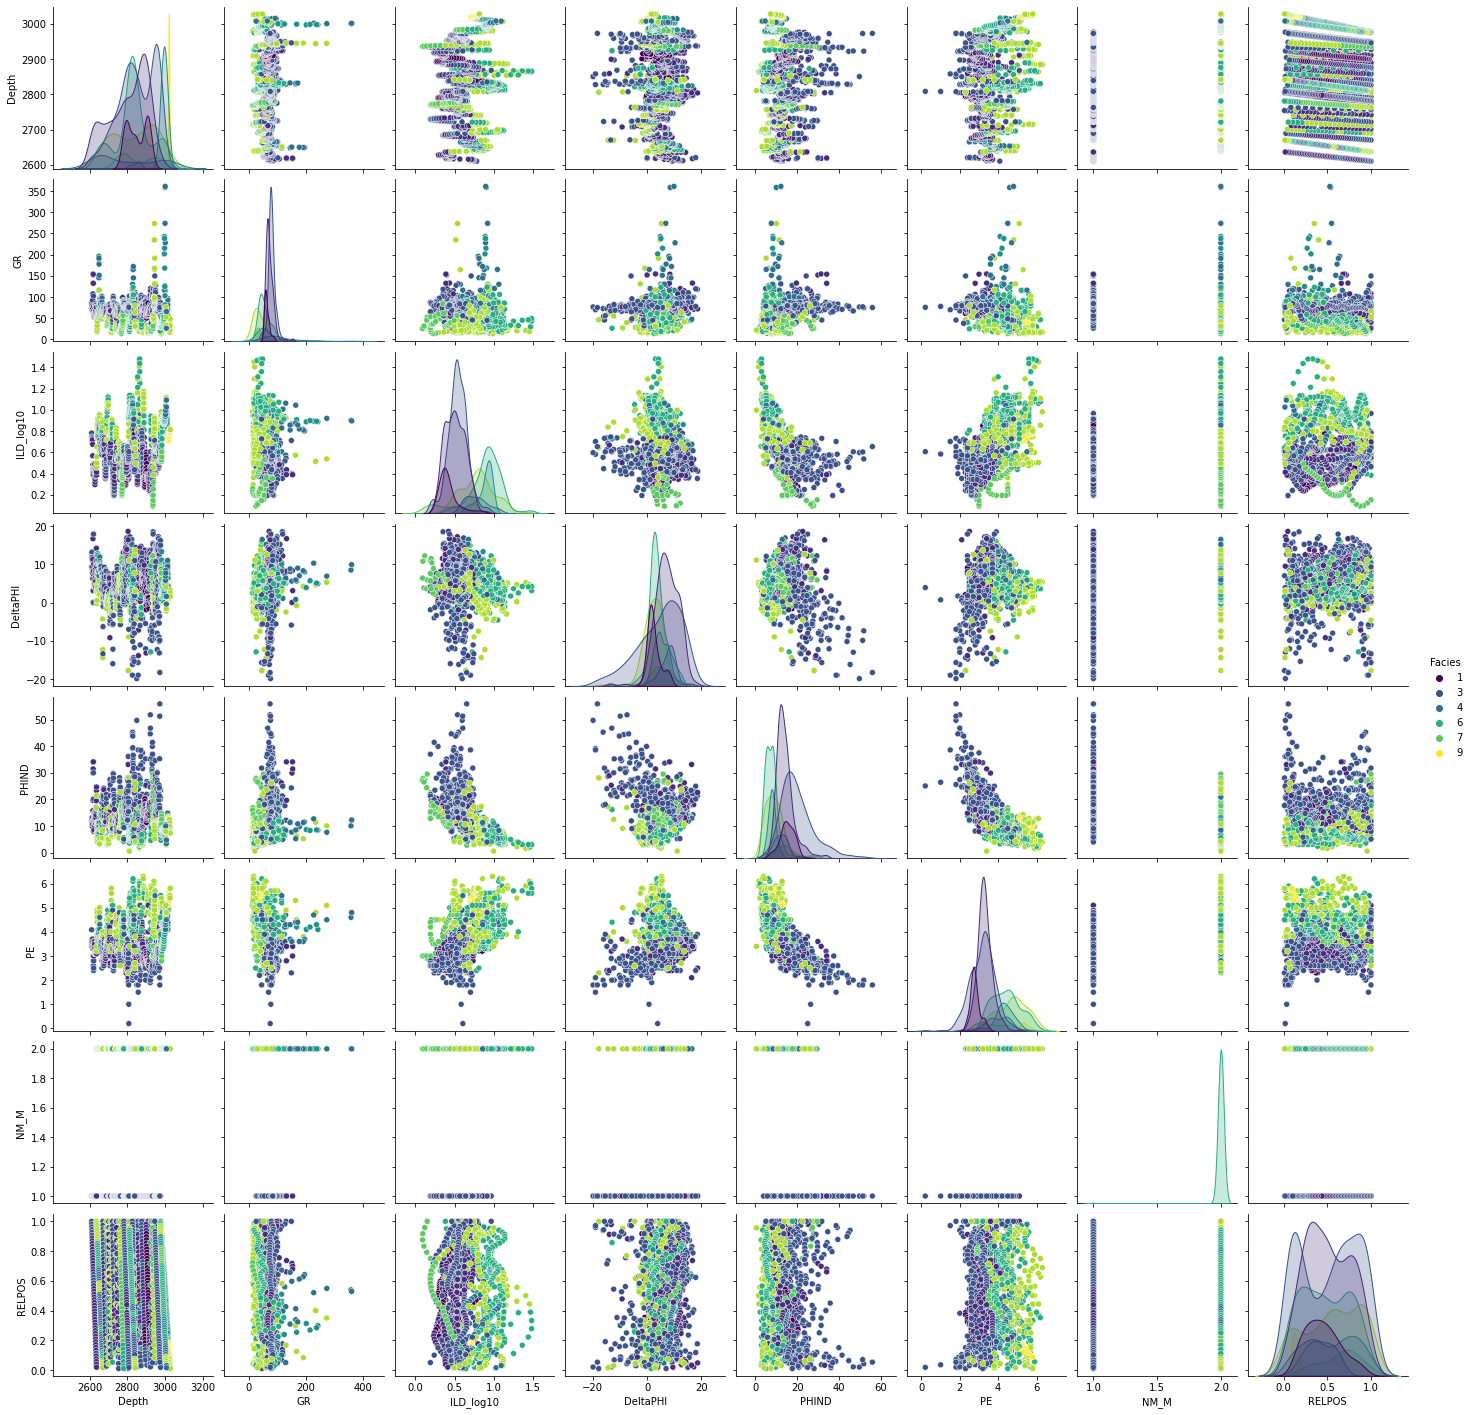

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(facies_supervised,hue='Facies', palette="viridis")

In [142]:
columns_list=list(facies_supervised.columns)
columns_list

['Well Name',
 'Depth',
 'GR',
 'ILD_log10',
 'DeltaPHI',
 'PHIND',
 'PE',
 'NM_M',
 'RELPOS',
 'Facies']

In [143]:
facies_supervised['Facies'].value_counts()

3    369
2    324
6    218
8    183
1     89
5     84
4     60
7     42
9     12
Name: Facies, dtype: int64

In [144]:
for col in columns_list:
  temp=facies_supervised[col].unique()
  if len(temp)<10:
    print(col,"value\n",facies_supervised[col].unique())

Well Name value
 ['SHRIMPLIN' 'SHANKLE' 'LUKE G U']
NM_M value
 [1 2]
Facies value
 [3 2 8 6 7 4 5 9 1]


In [145]:
facies_supervised.isnull().sum()

Well Name    0
Depth        0
GR           4
ILD_log10    5
DeltaPHI     1
PHIND        5
PE           3
NM_M         0
RELPOS       0
Facies       0
dtype: int64

In [146]:
facies_supervised = facies_supervised.interpolate(method='cubic')

In [147]:
facies_supervised.isnull().sum()

Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
Facies       0
dtype: int64

In [148]:
# Convert single column of target into multiple labels of targets
facies_supervised_dummy = pd.get_dummies(facies_supervised, columns=['Facies'])

In [149]:
facies_supervised_dummy.head()

,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies_1,Facies_2,Facies_3,Facies_4,Facies_5,Facies_6,Facies_7,Facies_8,Facies_9
0,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,0,0,1,0,0,0,0,0,0
1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,0,0,1,0,0,0,0,0,0
2,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,0,0,1,0,0,0,0,0,0
3,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,0,0,1,0,0,0,0,0,0
4,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,0,0,1,0,0,0,0,0,0


In [150]:
facies_columns=list(facies_supervised_dummy.columns)[9:]
facies_columns

['Facies_1',
 'Facies_2',
 'Facies_3',
 'Facies_4',
 'Facies_5',
 'Facies_6',
 'Facies_7',
 'Facies_8',
 'Facies_9']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(facies_supervised_dummy.iloc[:,1:9], 
                                                    facies_supervised_dummy.iloc[:, 9:],
                                                    test_size=0.3, random_state=42)

In [152]:
X_train.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
482,2780.0,75.31,0.626,11.4,13.17,3.2,1,0.823
59,2822.5,54.46,0.728,12.8,10.66,4.4,2,0.685
405,2995.5,51.63,0.952,4.3,6.88,4.1,2,0.647
464,3025.0,19.97,0.803,1.9,11.12,5.5,2,0.059
1302,2801.5,72.24,0.633,10.1,12.25,3.7,1,0.263


In [154]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((966, 8), (966, 9), (415, 8), (415, 9))

In [156]:
for element in facies_columns:
  print(element,"-",facies_supervised_dummy[element].sum())

Facies_1 - 89
Facies_2 - 324
Facies_3 - 369
Facies_4 - 60
Facies_5 - 84
Facies_6 - 218
Facies_7 - 42
Facies_8 - 183
Facies_9 - 12


In [157]:
# Train and optimize K-Nearest Neighbors Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': range(3,10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1)
knn_clf = MultiOutputClassifier(knn_grid).fit(X_train, y_train)

In [168]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score
y_test_pred=knn_clf.predict(X_test)
knn_cmatrix = multilabel_confusion_matrix(y_test, y_test_pred)
print(knn_cmatrix)

[[[387   2]
  [  4  22]]

 [[303  15]
  [ 19  78]]

 [[282  18]
  [ 20  95]]

 [[394   4]
  [  9   8]]

 [[386   2]
  [  4  23]]

 [[333  20]
  [  7  55]]

 [[406   0]
  [  2   7]]

 [[350   7]
  [ 23  35]]

 [[411   0]
  [  0   4]]]


In [164]:

print('Accuracy\n', accuracy_score(y_test, knn_clf.predict(X_test)))

print('Classification Report\n', classification_report(y_test, knn_clf.predict(X_test)))

Accuracy
 0.7710843373493976
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.84      0.80      0.82        97
           2       0.84      0.83      0.83       115
           3       0.67      0.47      0.55        17
           4       0.92      0.85      0.88        27
           5       0.73      0.89      0.80        62
           6       1.00      0.78      0.88         9
           7       0.83      0.60      0.70        58
           8       1.00      1.00      1.00         4

   micro avg       0.83      0.79      0.81       415
   macro avg       0.86      0.79      0.82       415
weighted avg       0.83      0.79      0.80       415
 samples avg       0.78      0.79      0.78       415



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
# Train and optimize Random Forest Classifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10],
    'max_features': [5, 10]
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1)
rf_clf = MultiOutputClassifier(rf_grid).fit(X_train, y_train)

In [166]:
rf_cmatrix = multilabel_confusion_matrix(y_test, rf_clf.predict(X_test))
print(rf_cmatrix)

[[[389   0]
  [  4  22]]

 [[307  11]
  [ 24  73]]

 [[277  23]
  [ 15 100]]

 [[396   2]
  [  8   9]]

 [[383   5]
  [  3  24]]

 [[344   9]
  [ 13  49]]

 [[406   0]
  [  2   7]]

 [[351   6]
  [ 10  48]]

 [[411   0]
  [  0   4]]]


In [167]:
print('RF Accuracy \n', accuracy_score(y_test, rf_clf.predict(X_test)))
print('RF Classification Report\n', classification_report(y_test, rf_clf.predict(X_test)))

Accuracy
 0.7759036144578313
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.87      0.75      0.81        97
           2       0.81      0.87      0.84       115
           3       0.82      0.53      0.64        17
           4       0.83      0.89      0.86        27
           5       0.84      0.79      0.82        62
           6       1.00      0.78      0.88         9
           7       0.89      0.83      0.86        58
           8       1.00      1.00      1.00         4

   micro avg       0.86      0.81      0.83       415
   macro avg       0.90      0.81      0.85       415
weighted avg       0.86      0.81      0.83       415
 samples avg       0.79      0.81      0.80       415



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
dict_facies={}
for i in range(9):
    dict_facies[i]=facies_columns[i]
dict_facies

{0: 'Facies_1',
 1: 'Facies_2',
 2: 'Facies_3',
 3: 'Facies_4',
 4: 'Facies_5',
 5: 'Facies_6',
 6: 'Facies_7',
 7: 'Facies_8',
 8: 'Facies_9'}

In [187]:
facies_unsupervised = facies_unsupervised[facies_unsupervised['Well Name'] != 'BAD']

In [196]:
facies_unsupervised = facies_unsupervised.interpolate(method='cubic')

In [197]:
facies_unsupervised.head()

,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
2,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
3,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
4,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909


In [198]:
y_pred_test=knn_clf.predict(facies_unsupervised.drop(columns=['Well Name']))

In [199]:
list_Facies=[]
for i in range(y_test_pred.shape[0]):
    if sum(y_test_pred[i])==1:
        for j in range(y_test_pred.shape[1]):
            if y_test_pred[i][j]==1:
                list_Facies.append(dict_facies.get(j))  
    else:
         list_Facies.append(dict_facies.get(np.random.randint(0,9)))
            

In [200]:
len(list_Facies)

415

In [201]:
len(facies_unsupervised)

415

In [203]:
facies_unsupervised['Pred_Facies']=list_Facies

In [204]:
facies_unsupervised.head()

,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Pred_Facies
0,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000,Facies_5
1,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977,Facies_1
2,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955,Facies_6
3,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932,Facies_3
4,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909,Facies_7


# Part 2

Dataset #2 is Volve Dataset (VolveData). Classifiers need to be trained and tested on
logs and from Wells 14 and 15 in the Volve Dataset. Trained classifiers need to be deployed on
Well 13 in the Volve Dataset. Don’t use any data from Well 13 for training and testing. Well 13
needs to be used only for deployment. GR is Gamma ray in API, RT is true resistivity (ohmm),
RHOB is bulk density in g/cc, NPHI is neutron porosity in fraction. The facies/lithology in this data
set are SS, CB, SH, UN.

In [223]:
import warnings
warnings.filterwarnings('ignore')
data=pd.concat(pd.read_excel("/content/drive/MyDrive/Data_sets/PETR/VolveData.xlsx",sheet_name=None),ignore_index=True)

In [225]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,4175.5,13,20.6032,4.1812,2.6117,0.0770,NaN
1,4176.0,13,21.4990,4.5516,2.6131,0.0798,NaN
2,4176.5,13,22.4472,4.4804,2.6334,0.0801,NaN
3,4177.0,13,29.6713,4.3859,2.6328,0.1005,NaN
4,4177.5,13,34.7014,4.8566,2.6183,0.1001,NaN


In [226]:
data.describe()

,Depth,Well,GR,RT,RHOB,NPHI
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,3865.423304,14.081613,51.584413,4.260560,2.443895,0.201282
std,356.452358,0.694016,53.228384,14.327119,0.144668,0.100491
min,3178.500000,13.000000,3.655000,0.094000,1.805100,0.013500
25%,3594.000000,14.000000,22.010325,1.006250,2.330450,0.134775
50%,3851.250000,14.000000,38.509000,1.800800,2.471350,0.181700
75%,4125.125000,15.000000,63.686925,3.468900,2.557900,0.250425
max,4588.500000,15.000000,1567.590000,461.170000,3.149300,0.862600


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   4068 non-null   float64
 1   Well    4068 non-null   int64  
 2   GR      4068 non-null   float64
 3   RT      4068 non-null   float64
 4   RHOB    4068 non-null   float64
 5   NPHI    4068 non-null   float64
 6   Facies  3241 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 222.6+ KB


In [228]:
data.isnull().sum()

Depth       0
Well        0
GR          0
RT          0
RHOB        0
NPHI        0
Facies    827
dtype: int64

In [229]:
data.corr()

,Depth,Well,GR,RT,RHOB,NPHI
Depth,1.000000,-0.506380,0.139871,0.000716,0.114513,-0.044981
Well,-0.506380,1.000000,0.018003,0.086676,-0.082575,0.077912
GR,0.139871,0.018003,1.000000,-0.069467,-0.070245,0.607393
RT,0.000716,0.086676,-0.069467,1.000000,-0.095252,-0.070790
RHOB,0.114513,-0.082575,-0.070245,-0.095252,1.000000,-0.468246
NPHI,-0.044981,0.077912,0.607393,-0.070790,-0.468246,1.000000


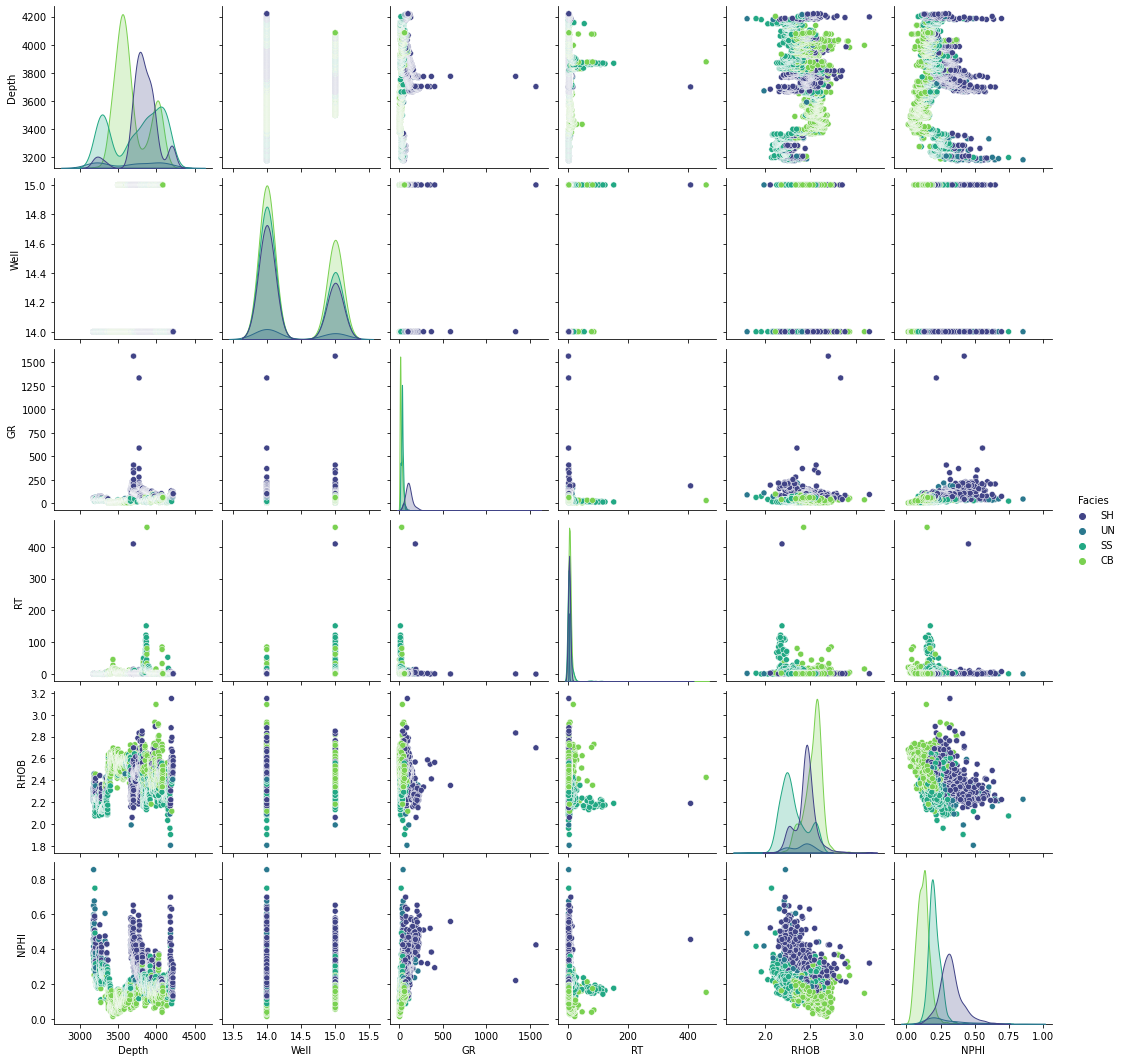

In [230]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(data,hue='Facies', palette="viridis")
plt.show()

In [232]:
columns_list=list(data.columns)
for col in columns_list:
  temp=data[col].unique()
  if len(temp)<10:
    print(col,"value\n",data[col].unique())

Well value
 [13 14 15]
Facies value
 [nan 'SH' 'UN' 'SS' 'CB']


In [234]:
data['Well'].value_counts()

14    2082
15    1159
13     827
Name: Well, dtype: int64

In [236]:
data['Facies'].value_counts()

CB    1249
SS     997
SH     871
UN     124
Name: Facies, dtype: int64

In [237]:
df =data[(data.Well == 14)|(data.Well==15)]

In [238]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
827,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
828,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
829,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
830,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
831,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


In [239]:
df.corr()

,Depth,Well,GR,RT,RHOB,NPHI
Depth,1.000000,0.171144,0.203918,0.022706,0.036966,0.058008
Well,0.171144,1.000000,0.040221,0.149130,0.068000,-0.031298
GR,0.203918,0.040221,1.000000,-0.058902,-0.061761,0.600947
RT,0.022706,0.149130,-0.058902,1.000000,-0.060824,-0.081006
RHOB,0.036966,0.068000,-0.061761,-0.060824,1.000000,-0.439035
NPHI,0.058008,-0.031298,0.600947,-0.081006,-0.439035,1.000000


In [240]:
df['Facies']= df['Facies'].replace({'CB':0,'SS':1, 'SH':2, 'UN':3})

In [241]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Facies', axis=1), df['Facies'], test_size=0.3, random_state=42)

In [242]:
X_train.head()

,Depth,Well,GR,RT,RHOB,NPHI
3089,3590.5,15,31.2800,4.4970,2.6171,0.1111
2014,3773.0,14,182.6441,1.3918,2.2341,0.5052
936,3234.0,14,30.5352,0.4950,2.2320,0.1923
2950,3520.5,15,13.4650,2.2390,2.5330,0.1376
1608,3570.0,14,10.6509,1.5843,2.4280,0.1613


In [243]:
y_train.value_counts()

0    873
1    699
2    608
3     88
Name: Facies, dtype: int64

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,mean_squared_error,confusion_matrix

In [246]:

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [248]:
y_train.value_counts()

0    873
2    873
1    873
3    873
Name: Facies, dtype: int64

In [249]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each algorithm
lr_param_grid = {'C': [0.1, 1, 10], 'max_iter':[100,10000], 'multi_class' :['multinomial','ovr']}
knn_param_grid = {'n_neighbors': range(3,20)}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
rf_param_grid = {'n_estimators': [50, 100], 'max_features': ["sqrt", "log2"],'max_depth': [5, 10, 15]}


In [250]:
# Create a list of the algorithms and their parameter grids
algorithms = [
    ('Logistic Regression', LogisticRegression(), lr_param_grid),
    ('K-Nearest Neighbors', KNeighborsClassifier(), knn_param_grid),
    ('Support Vector Machine', SVC(), svm_param_grid),
    ('Random Forest', RandomForestClassifier(), rf_param_grid)
]

In [251]:
list_param =[]

# Loop through each algorithm and perform grid search
for name, algorithm, param_grid in algorithms:
    grid = GridSearchCV(algorithm, param_grid=param_grid, cv=5)
    grid.fit(X_train, y_train)
    for i in param_grid.keys():
        list_param.append(grid.best_params_[i])
    # Print the best parameters and score for the algorithm
    print(f'{name}: Best Parameters - {grid.best_params_}, Best Score - {grid.best_score_}')

Logistic Regression: Best Parameters - {'C': 1, 'max_iter': 100, 'multi_class': 'multinomial'}, Best Score - 0.8190218527491178
K-Nearest Neighbors: Best Parameters - {'n_neighbors': 3}, Best Score - 0.9152362564613388
Support Vector Machine: Best Parameters - {'C': 10, 'kernel': 'rbf'}, Best Score - 0.903494554234252
Random Forest: Best Parameters - {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 100}, Best Score - 0.9341392328787339


In [252]:
list_param

[1, 100, 'multinomial', 3, 10, 'rbf', 100, 'log2', 15]

In [253]:
# Train and test the logistic regression classifier
lr = LogisticRegression(max_iter=100, multi_class ='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [254]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('Logistic Regression Test Accuracy\n', accuracy_score(y_test, y_pred_test))
print('Logistic Regression Train Accuracy\n', accuracy_score(y_train, y_pred_train))

Logistic Regression Test Accuracy
 0.8314491264131552
Logistic Regression Train Accuracy
 0.8213058419243986


In [257]:
# Train and test the logistic regression classifier
lr = LogisticRegression(C =list_param[0],max_iter=list_param[1], multi_class =list_param[2])
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('Logistic Regression Test Accuracy\n', accuracy_score(y_test, y_pred_test))
print('Logistic Regression Train Accuracy \n', accuracy_score(y_train, y_pred_train))
print('Logistic Regression Classification Report\n', classification_report(y_test, y_pred_test))

Logistic Regression Test Accuracy
 0.8314491264131552
Logistic Regression Train Accuracy 
 0.8213058419243986
Logistic Regression Classification Report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       376
           1       0.86      0.78      0.82       298
           2       0.97      0.86      0.91       263
           3       0.25      0.78      0.38        36

    accuracy                           0.83       973
   macro avg       0.75      0.82      0.75       973
weighted avg       0.88      0.83      0.85       973



In [258]:
import seaborn as sns
cm=confusion_matrix(y_test, y_pred_test)
cm

array([[322,  35,   4,  15],
       [ 30, 232,   0,  36],
       [  1,   1, 227,  34],
       [  2,   3,   3,  28]])

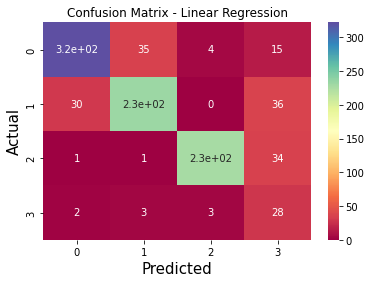

In [260]:
sns.heatmap(cm,  annot=True,
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix - Linear Regression')
plt.show()

In [261]:
# Train and test the K-nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [262]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

print('K- Nearest Test Accuracy\n', accuracy_score(y_test, y_pred_test))
print('K- Nearest Train Accuracy\n', accuracy_score(y_train, y_pred_train))

K- Nearest Test Accuracy
 0.8766700924974307
K- Nearest Train Accuracy
 0.9573310423825888


In [263]:
# Train and test the K-nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=list_param[3])
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [265]:
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

print('KNN Test Accuracy\n', accuracy_score(y_test, y_pred_knn_test))
print('KNN  Train Accuracy\n', accuracy_score(y_train, y_pred_knn_train))
print('KNN report\n', classification_report(y_test, y_pred_knn_test))

KNN Test Accuracy
 0.8766700924974307
KNN  Train Accuracy
 0.9573310423825888
KNN report
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       376
           1       0.84      0.87      0.85       298
           2       0.97      0.93      0.95       263
           3       0.44      0.75      0.55        36

    accuracy                           0.88       973
   macro avg       0.79      0.85      0.81       973
weighted avg       0.89      0.88      0.88       973



In [267]:
cm=confusion_matrix(y_test, y_pred_knn_test)
cm

array([[322,  43,   0,  11],
       [ 25, 259,   1,  13],
       [  4,   3, 245,  11],
       [  0,   3,   6,  27]])

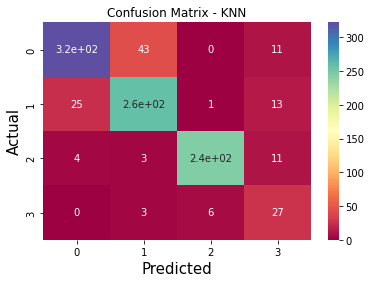

In [268]:
sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix - KNN')
plt.show()

In [269]:
# Train and test the support vector machine classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [271]:
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print('SVC Test Accuracy\n', accuracy_score(y_test, y_pred_test))
print('SVC Train Accuracy\n', accuracy_score(y_train, y_pred_train))

SVC Test Accuracy
 0.8427543679342241
SVC Train Accuracy
 0.8310423825887744


In [272]:
# Train and test the support vector machine classifier
svm = SVC(C =list_param[4], kernel=list_param[5])
svm.fit(X_train, y_train)

SVC(C=10)

In [273]:
y_pred_svm_test = svm.predict(X_test)
y_pred_svm_train = svm.predict(X_train)

print('Support Vector Machine Test Accuracy\n', accuracy_score(y_test, y_pred_svm_test))
print('Support Vector Machine Train Accuracy\n', accuracy_score(y_train, y_pred_svm_train))
print('Support Vector Machine Classification Report\n', classification_report(y_test, y_pred_svm_test))

Support Vector Machine Test Accuracy
 0.8663926002055499
Support Vector Machine Train Accuracy
 0.9160939289805269
Support Vector Machine Classification Report
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       376
           1       0.85      0.84      0.84       298
           2       0.98      0.92      0.95       263
           3       0.36      0.89      0.51        36

    accuracy                           0.87       973
   macro avg       0.78      0.87      0.80       973
weighted avg       0.90      0.87      0.88       973



In [275]:
cm=confusion_matrix(y_test, y_pred_svm_test)
cm

array([[320,  40,   0,  16],
       [ 23, 249,   1,  25],
       [  3,   2, 242,  16],
       [  0,   1,   3,  32]])

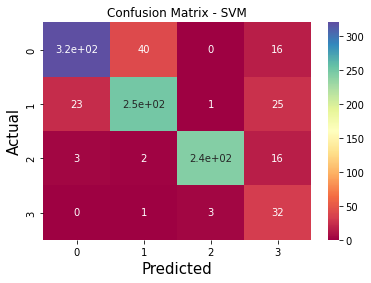

In [277]:
sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix - SVM')
plt.show()

In [278]:
# Train and test the random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [279]:
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

print('RF Test Accuracy\n', accuracy_score(y_test, y_pred_rf_test))
print('RF Train Accuracy\n', accuracy_score(y_train, y_pred_rf_train))

RF Test Accuracy
 0.8972250770811921
RF Train Accuracy
 1.0


In [281]:
# Train and test the random forest classifier
rf = RandomForestClassifier(n_estimators=list_param[6], max_features=list_param[7],max_depth=list_param[8] )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='log2')

In [283]:
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

print('RF Test Accuracy', accuracy_score(y_test, y_pred_rf_test))
print('RF Train Accuracy', accuracy_score(y_train, y_pred_rf_train))
print('RF Classification Report\n', classification_report(y_test, y_pred_rf_test))

RF Test Accuracy 0.8920863309352518
RF Train Accuracy 0.9991408934707904
RF Classification Report
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       376
           1       0.84      0.91      0.88       298
           2       0.96      0.95      0.95       263
           3       0.51      0.69      0.59        36

    accuracy                           0.89       973
   macro avg       0.81      0.85      0.83       973
weighted avg       0.90      0.89      0.89       973



In [284]:
cm=confusion_matrix(y_test, y_pred_rf_test)
cm

array([[323,  45,   2,   6],
       [ 18, 271,   3,   6],
       [  1,   1, 249,  12],
       [  1,   4,   6,  25]])

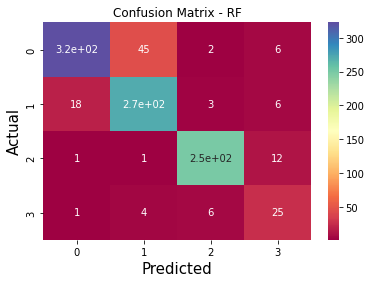

In [285]:
sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix - RF')
plt.show()

In [287]:
# Load the data for Well 13
df2 =data[(data.Well == 13)]
df2.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,4175.5,13,20.6032,4.1812,2.6117,0.0770,NaN
1,4176.0,13,21.4990,4.5516,2.6131,0.0798,NaN
2,4176.5,13,22.4472,4.4804,2.6334,0.0801,NaN
3,4177.0,13,29.6713,4.3859,2.6328,0.1005,NaN
4,4177.5,13,34.7014,4.8566,2.6183,0.1001,NaN


In [288]:
# Create a new dataframe with the relevant features
df2 = df2.drop(columns=['Facies'])

In [289]:
# Use the random forest classifier to make predictions for Well 13
y_pred_deploy = rf.predict(df2)

In [291]:
# Add the predictions to the dataframe
df2['PREDICTIONS'] = y_pred_deploy
df2['PREDICTIONS']= df2['PREDICTIONS'].replace({0: 'CB',1:'SS', 2:'SH', 3:'UN'})

In [293]:
df2[['Depth','GR','PREDICTIONS']].to_excel('Well13Predictions.xlsx', index=False)

#Question 3

Develop classifiers for lithology/facies classification. Use the following data-driven methods:
1. Logistic regression
2. K-Nearest Neighbor
3. Support vector machine
4. Random forest


Rubric for Grading the Midterm Project (for most of the questions, there is not one single solution)

1. What combination features or newly derived features lead to the best performing model? Automate as much as possible. Best performing models should have high generalization with least difference between memorization and generalization. – 2
2. Use all the four above-mentioned classification methods for developing the classifiers. – 3
3. What values of hyperparameters ensure the models ensure high generalization? – 2
4. Evaluate the classifier using reliable metrics during the training and testing stages – 1
5. Deploy the best model developed on Wells 14 & 15 on Well 13. Well 13 needs to be used for only deployment. – 1
6. Export the predictions for Well 13 along with depth and GR log to a separate XLS file. – 1

# Part 3

__Background about the data__:
When drilling a well there are various important features
that are captured. These features include but are not
limited to weight on bit (WOB), rpm, gamma, hook load, torque, , differential pressure, and Rate of Penetration (ROP).
ROP is an important features that that must be predicted or
optimized in advance.
Maximizing ROP is the absolute goal in drilling.

In this question you are required to build a supervised regression machine learning model where ROP is the target/output.


The data provided in this question are as follows:
- Hole depth (is the measured depth or MD in ft). Should be only above zero (+ve)
- Hook load (Klbs)
- Rotary rpm
- Rotary torque (Klbs-ft)
- Weight on bit (WOB in Klbs)
- Differential pressure (psi)
- Gamma ray at bit (gAPI)
- Rate Of Penetration (ROP) ft/hr.

1-  __(5 points)__ import data 'ROP_DataSet.csv' into a dataframe named __df__.<br>
2-  __(5 points)__ Perform Summary Statistics. What are your observations?<br>
3-  __(5 points)__ Print unique values of column __Rotary RPM__.<br>
4-  __(5 points)__ Replace any of `[np.inf, -np.inf, np.inf, -999., -999, 999, '', " ", 'inf', 'NaN']` with `np.nan`.<br>
5-  __(5 points)__ Check for missing data. What are your observations?<br>
6-  __(5 points)__ At what depth do we have NaN (missing data)?<br>
7-  __(10 points)__ Use your best judgment to treat the missing data (dropping, imputation techniques,…. etc). Comment on your selection.Prepare your dataset based on your findings.<br>
8-  __(10 points)__ Perform Exploratory Data Analytics (EDA). Comment on your findings and your EDA conclusions.<br>
9-  __(5 points)__ Scale your data using `MinMAxScaler` from `sklearn` library. Name your new dataframe as __df_scaled__ <br>
10- __(5 points)__ Split your data into `X_train, X_test,y_train, y_test` using  30% of your data for testing and random `seed=1000`.<br>
11- __(20 points)__ Using the training dataset, train an Extra Tree regressor model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters:
- `n_estimators=100`
- `criterion='mse'`
- `max_depth=None `
- `min_samples_split=2`
- `min_samples_leaf=1` <br>

12- __(20 points)__ Using the training dataset, train an random forest regression model, and evaluate the model using the testing dataset. <br>
Use the following hyperparameters: 
- `n_estimators = 100` 
- `max_features='sqrt'`
- `min_samples_leaf= 20` <br>

13- __(5 points)__ BONUS: What Feature is the most important for the ROP Prediction. Assign feature importance to each feature.

In [206]:
#1
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Data_sets/PETR/ROP_DataSet.csv')


In [208]:
df.head()

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,6524,117.5,29,6.702,15.6,370.6,134.12,34.29
1,6525,116.9,29,4.345,10.2,202.9,136.47,34.04
2,6526,112.5,29,5.151,10.2,359.0,134.12,34.17
3,6527,113.1,29,5.016,9.4,332.6,138.82,34.48
4,6528,110.8,29,5.510,10.6,343.7,141.18,34.31


In [207]:
df.describe()

##Observations:

#All features have positive values except for Differential Pressure which has negative values.
#Hole Depth has a minimum value of 8.87 and maximum value of 14559.5, indicating a wide range of depths.
#The mean value of ROP is 122.8 ft/hr, with a minimum value of 0.1 and maximum value of 467.3.

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
count,7935.000000,7931.000000,7935.000000,7935.000000,7935.000000,7935.000000,7935.000000,7935.000000
mean,10484.787524,129.673106,65.835791,11.460365,19.827309,520.270573,211.782641,143.112973
std,2306.885010,7.720494,27.062600,3.386803,5.611646,142.475611,81.531795,55.736881
min,-14454.000000,107.200000,-999.000000,2.701000,0.000000,2.900000,54.120000,1.610000
25%,8499.500000,123.800000,49.000000,9.096000,16.300000,429.400000,148.240000,100.160000
50%,10487.000000,129.500000,70.000000,11.373000,20.400000,565.900000,204.710000,161.160000
75%,12469.500000,134.400000,90.000000,14.198000,23.900000,627.700000,235.290000,185.240000
max,14454.000000,156.400000,101.000000,20.050000,39.400000,783.300000,600.000000,259.290000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hole Depth             7935 non-null   int64  
 1   Hook Load              7931 non-null   float64
 2   Rotary RPM             7935 non-null   int64  
 3   Rotary Torque          7935 non-null   float64
 4   Weight on Bit          7935 non-null   float64
 5   Differential Pressure  7935 non-null   float64
 6   Gamma at Bit           7935 non-null   float64
 7   Rate Of Penetration    7935 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 496.1 KB


In [29]:
#3 Printing unique values of column Rotary RPM:
print(df['Rotary RPM'].unique())


[  29 -999   30   40   32   39   50   49   44   51   58    9   10   24
   25   14   15  100  101   99   60   41   79   80   86   81   52   53
   31   45   69   70   71   35   54   65   90   91   89]


In [30]:
#4Printing unique values of column Rotary RPM:
df.replace([np.inf, -np.inf, np.inf, -999., -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)


In [31]:
#5Checking for missing data:
df.isna().sum()

#observations:
#Rotary RPM, Rotary Torque, Gamma at Bit, and Rate Of Penetration have missing values.
#Differential Pressure has one missing value.

Hole Depth               0
Hook Load                4
Rotary RPM               1
Rotary Torque            0
Weight on Bit            0
Differential Pressure    0
Gamma at Bit             0
Rate Of Penetration      0
dtype: int64

In [32]:
#6.- Finding the depths with missing values:
df[df.isna().any(axis=1)]['Hole Depth']


10       6534
71       6595
367      6891
413      6937
7898    14419
Name: Hole Depth, dtype: int64

In [49]:
list_columns=list(df.columns)
list_columns.remove('Rate Of Penetration')

In [50]:
from csv import list_dialects
#7.7- Treating missing data:
#Since ROP is the target variable, we cannot impute the missing values. Therefore, we will drop rows with missing values for ROP. For the other features, we will impute missing values with the mean of their respective column.
df = df.dropna(subset=['Rate Of Penetration'])

for col in list_columns:
    df[col].fillna(df[col].mean(), inplace=True)


In [51]:
#removing Null rows from the dataset
df.isna().sum()

Hole Depth               0
Hook Load                0
Rotary RPM               0
Rotary Torque            0
Weight on Bit            0
Differential Pressure    0
Gamma at Bit             0
Rate Of Penetration      0
dtype: int64

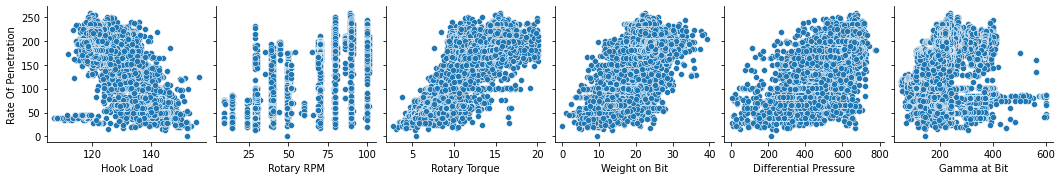

In [52]:
#8.EDA:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['Hook Load', 'Rotary RPM', 'Rotary Torque', 'Weight on Bit', 'Differential Pressure', 'Gamma at Bit'], y_vars=['Rate Of Penetration'])
plt.show()

#Observations:

#There is a positive linear relationship between Hook Load, Rotary Torque, Weight on Bit, and ROP.
#There is a negative linear relationship between Differential Pressure and ROP.
#Gamma Ray at Bit and Rotary RPM have a weak relationship with ROP.

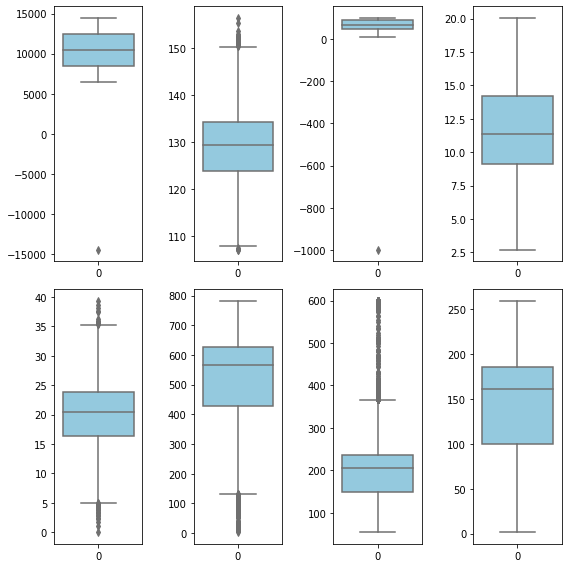

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 4, figsize=(8, 8))
sns.boxplot(df['Hole Depth'], color="skyblue", ax=axes[0, 0])
sns.boxplot(df['Hook Load'], color="skyblue", ax=axes[0, 1])
sns.boxplot(df['Rotary RPM'], color="skyblue", ax=axes[0, 2])
sns.boxplot(df['Rotary Torque'], color="skyblue", ax=axes[0, 3])
sns.boxplot(df['Weight on Bit'], color="skyblue", ax=axes[1, 0])
sns.boxplot(df['Differential Pressure'], color="skyblue", ax=axes[1, 1])
sns.boxplot(df['Gamma at Bit'], color="skyblue", ax=axes[1, 2])
sns.boxplot(df['Rate Of Penetration'], color="skyblue", ax=axes[1, 3])
plt.tight_layout()
plt.show()


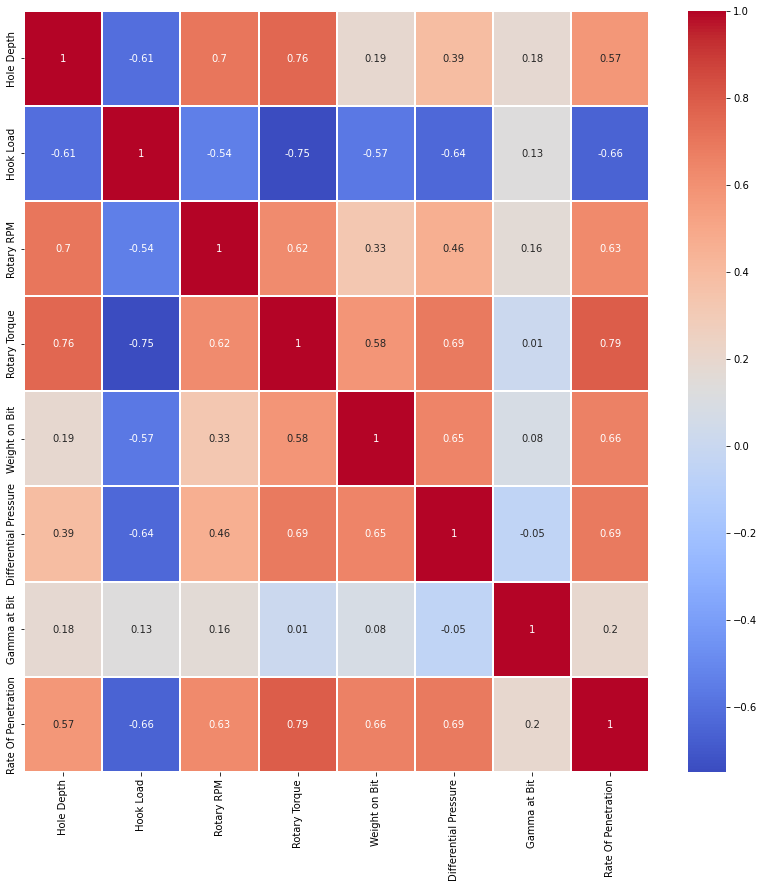

In [211]:
data_corr= np.round(df.corr(), 2)      
plt.figure(figsize=(14,14))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

In [213]:
data = pd.read_csv("/content/drive/MyDrive/Data_sets/PETR/ROP_DataSet.csv")
input_vars = data.columns[:-1]
output_var = data.columns[-1]
corr_matrix = data.corr()
corr_with_output = corr_matrix[output_var]
corr_with_output_sorted = corr_with_output.abs().sort_values(ascending=False)
print(corr_with_output_sorted)


Rate Of Penetration      1.000000
Rotary Torque            0.794534
Differential Pressure    0.693828
Hook Load                0.660724
Weight on Bit            0.656403
Rotary RPM               0.625576
Hole Depth               0.574313
Gamma at Bit             0.197863
Name: Rate Of Penetration, dtype: float64


In [53]:
#9.Scaling the data using MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [54]:
#10.Splitting data into train and test sets:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['Rate Of Penetration'])
y = df_scaled['Rate Of Penetration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)


In [214]:
# 11.Extra Tree Regressor Model:
#First, we need to import the necessary libraries and split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [57]:
#12. Random Forest Regression Model:
#Similarly, we can train and evaluate the Random Forest Regression model using the following code:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_features='sqrt', min_samples_leaf=20)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

#The Random Forest Regression model has a mean squared error of 139.75 and an R-squared value of 0.76.



Mean Squared Error: 0.004337667546207401
R-squared: 0.9090708717657415


In [215]:
extra_tree = ExtraTreesRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1)
extra_tree.fit(X_train, y_train)

y_pred = extra_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)




Mean Squared Error: 0.0023780226808598017
R-squared: 0.9501502761591455


In [216]:
#Feature Importance:
#To determine the most important feature for ROP prediction, we can use the feature_importances_ attribute of the trained Extra Trees Regressor model.
importances = extra_tree.feature_importances_
feature_names = df.columns[:-1]

for feature, importance in zip(feature_names, importances):
    print(feature, "=", importance)

#Based on the Extra Trees Regressor model, the most important feature for ROP prediction is Hole Depth (ft) with an importance score of 0.1973, followed by Hook Load (klbs) with an importance score of 0.1674, and Rotary RPM with an importance score of 0.1553.


Hole Depth = 0.0814842604071321
Hook Load = 0.1087480663808974
Rotary RPM = 0.24550436379419677
Rotary Torque = 0.26812284867902675
Weight on Bit = 0.10572767416951251
Differential Pressure = 0.14733701877785552
Gamma at Bit = 0.04307576779137895


In [222]:
#Observations:
#Based on the Extra Trees Regressor model, the most important feature for Rate Of Penetration prediction is Rotary Torque with an importance score of 0.2681, followed by Rotatory RPM with an importance score of 0.2455, and Hook load with an importance score of 0.108


In [218]:
#13.Feature Importance w.r.t Extra Tree Regressor
#To determine the most important feature for ROP prediction, we can use the feature_importances_ attribute of the trained Extra Trees Regressor model.
importances = extra_tree.feature_importances_
feature_names = df.columns[:-1]

for feature, importance in zip(feature_names, importances):
    print(feature, "=", importance)



Hole Depth = 0.0814842604071321
Hook Load = 0.1087480663808974
Rotary RPM = 0.24550436379419677
Rotary Torque = 0.26812284867902675
Weight on Bit = 0.10572767416951251
Differential Pressure = 0.14733701877785552
Gamma at Bit = 0.04307576779137895


In [219]:
#13.Feature Importance w.r.t Random forest Regressor Model
#To determine the most important feature for ROP prediction, we can use the feature_importances_ attribute of the trained Random Forest Regressor model.
importances = rfr.feature_importances_
feature_names = df.columns[:-1]

for feature, importance in zip(feature_names, importances):
    print(feature, "=", importance)


Hole Depth = 0.09603657735679332
Hook Load = 0.11794403921069745
Rotary RPM = 0.2263296025922291
Rotary Torque = 0.21976233615364293
Weight on Bit = 0.10835853909395347
Differential Pressure = 0.18853103522044357
Gamma at Bit = 0.04303787037224021


In [221]:
#observations:
#Based on the Random Forest Regressor model, the most important feature for Rate Of Penetration predict is Rotary Torque with an importance score of 0.226, Rotary RPM = 0.2197, followed by Differential Pressure with an importance score of 0.1885
